### MACHINE LEARNING PROJECT I

#### TEAM MEMBERS: ASLI YORUSUN - ERDEM BOCUGOZ - SERIF SONER SERBEST

In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import datetime
import matplotlib.pyplot as plt

from proj1_helpers import *
from implementations import *
from test import *
from data_cleaning import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
prediction,data,id_ = load_csv_data("train.csv", sub_sample=False)

In [5]:
data.shape

(250000, 30)

### Data Cleaning & Standardization

In [ ]:
#data = np.where(data==-999, np.nan, data)
#null_counts = data.isnull().sum()
#print(null_counts)

data = np.delete(data, [4,5,6,12,26,27,28], 1)
data.shape

In [ ]:
data = clean_data(data)

In [ ]:
x, mean_x, std_x = standardize(data)
y, tx = build_model_data(prediction,x)

In [ ]:
#TEST LEAST SQUARES AND RIDGE REGRESSION
def load_data():
    """load data."""
    data = np.loadtxt("dataEx3.csv", delimiter=",", skiprows=1, unpack=True)
    x = data[0]
    y = data[1]
    return x, y

# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

x.shape, y.shape

### Gradient Descent

In [73]:
# Define the parameters of the algorithm.
max_iters = 1000
gamma = 0.00001

# Initialization
initial_w = np.zeros(tx.shape[1])

weights, loss = least_squares_GD(y, tx, initial_w, max_iters, gamma)

Gradient Descent(0/999): loss=0.5000000000000001
Gradient Descent(1/999): loss=0.49823370920696813
Gradient Descent(2/999): loss=0.49665918418101845
Gradient Descent(3/999): loss=0.4952556012695155
Gradient Descent(4/999): loss=0.4940043980394159
Gradient Descent(5/999): loss=0.4928890277336968
Gradient Descent(6/999): loss=0.49189474039111464
Gradient Descent(7/999): loss=0.49100838773395034
Gradient Descent(8/999): loss=0.490218249242799
Gradient Descent(9/999): loss=0.48951387711772365
Gradient Descent(10/999): loss=0.48888595807492313
Gradient Descent(11/999): loss=0.4883261901507599
Gradient Descent(12/999): loss=0.4878271728835165
Gradient Descent(13/999): loss=0.4873823094202044
Gradient Descent(14/999): loss=0.4869857192534963
Gradient Descent(15/999): loss=0.486632160434469
Gradient Descent(16/999): loss=0.4863169602321843
Gradient Descent(17/999): loss=0.4860359533228785
Gradient Descent(18/999): loss=0.48578542669112584
Gradient Descent(19/999): loss=0.48556207051412775
Grad

Gradient Descent(278/999): loss=0.4836500576989265
Gradient Descent(279/999): loss=0.48364974482318285
Gradient Descent(280/999): loss=0.4836494319476771
Gradient Descent(281/999): loss=0.4836491190724095
Gradient Descent(282/999): loss=0.48364880619738
Gradient Descent(283/999): loss=0.48364849332258836
Gradient Descent(284/999): loss=0.48364818044803487
Gradient Descent(285/999): loss=0.48364786757371947
Gradient Descent(286/999): loss=0.4836475546996421
Gradient Descent(287/999): loss=0.48364724182580265
Gradient Descent(288/999): loss=0.4836469289522014
Gradient Descent(289/999): loss=0.4836466160788381
Gradient Descent(290/999): loss=0.4836463032057129
Gradient Descent(291/999): loss=0.48364599033282557
Gradient Descent(292/999): loss=0.48364567746017645
Gradient Descent(293/999): loss=0.48364536458776536
Gradient Descent(294/999): loss=0.48364505171559224
Gradient Descent(295/999): loss=0.48364473884365716
Gradient Descent(296/999): loss=0.4836444259719602
Gradient Descent(297/99

Gradient Descent(692/999): loss=0.4835205474892652
Gradient Descent(693/999): loss=0.4835202347120549
Gradient Descent(694/999): loss=0.4835199219350827
Gradient Descent(695/999): loss=0.48351960915834835
Gradient Descent(696/999): loss=0.48351929638185204
Gradient Descent(697/999): loss=0.48351898360559353
Gradient Descent(698/999): loss=0.48351867082957317
Gradient Descent(699/999): loss=0.4835183580537907
Gradient Descent(700/999): loss=0.48351804527824616
Gradient Descent(701/999): loss=0.48351773250293956
Gradient Descent(702/999): loss=0.48351741972787105
Gradient Descent(703/999): loss=0.48351710695304034
Gradient Descent(704/999): loss=0.4835167941784478
Gradient Descent(705/999): loss=0.4835164814040931
Gradient Descent(706/999): loss=0.4835161686299764
Gradient Descent(707/999): loss=0.4835158558560976
Gradient Descent(708/999): loss=0.48351554308245687
Gradient Descent(709/999): loss=0.483515230309054
Gradient Descent(710/999): loss=0.48351491753588904
Gradient Descent(711/9

### Stochastic Gradient Descent

In [72]:
# Define the parameters of the algorithm.
max_iters = 1000
gamma = 0.00001

# Initialization
initial_w = np.zeros(tx.shape[1])

weights, loss = least_squares_GD(y, tx, initial_w, max_iters, gamma)

Gradient Descent(0/999): loss=0.5000000000000001
Gradient Descent(1/999): loss=0.49823370920696813
Gradient Descent(2/999): loss=0.49665918418101845
Gradient Descent(3/999): loss=0.4952556012695155
Gradient Descent(4/999): loss=0.4940043980394159
Gradient Descent(5/999): loss=0.4928890277336968
Gradient Descent(6/999): loss=0.49189474039111464
Gradient Descent(7/999): loss=0.49100838773395034
Gradient Descent(8/999): loss=0.490218249242799
Gradient Descent(9/999): loss=0.48951387711772365
Gradient Descent(10/999): loss=0.48888595807492313
Gradient Descent(11/999): loss=0.4883261901507599
Gradient Descent(12/999): loss=0.4878271728835165
Gradient Descent(13/999): loss=0.4873823094202044
Gradient Descent(14/999): loss=0.4869857192534963
Gradient Descent(15/999): loss=0.486632160434469
Gradient Descent(16/999): loss=0.4863169602321843
Gradient Descent(17/999): loss=0.4860359533228785
Gradient Descent(18/999): loss=0.48578542669112584
Gradient Descent(19/999): loss=0.48556207051412775
Grad

Gradient Descent(300/999): loss=0.48364317448755256
Gradient Descent(301/999): loss=0.48364286161704567
Gradient Descent(302/999): loss=0.483642548746777
Gradient Descent(303/999): loss=0.48364223587674615
Gradient Descent(304/999): loss=0.48364192300695347
Gradient Descent(305/999): loss=0.48364161013739865
Gradient Descent(306/999): loss=0.483641297268082
Gradient Descent(307/999): loss=0.48364098439900355
Gradient Descent(308/999): loss=0.48364067153016294
Gradient Descent(309/999): loss=0.48364035866156035
Gradient Descent(310/999): loss=0.4836400457931959
Gradient Descent(311/999): loss=0.48363973292506945
Gradient Descent(312/999): loss=0.48363942005718097
Gradient Descent(313/999): loss=0.4836391071895307
Gradient Descent(314/999): loss=0.48363879432211826
Gradient Descent(315/999): loss=0.4836384814549439
Gradient Descent(316/999): loss=0.4836381685880076
Gradient Descent(317/999): loss=0.48363785572130946
Gradient Descent(318/999): loss=0.4836375428548492
Gradient Descent(319/

Gradient Descent(785/999): loss=0.48349146022670536
Gradient Descent(786/999): loss=0.4834911474716252
Gradient Descent(787/999): loss=0.48349083471678295
Gradient Descent(788/999): loss=0.4834905219621786
Gradient Descent(789/999): loss=0.4834902092078123
Gradient Descent(790/999): loss=0.48348989645368384
Gradient Descent(791/999): loss=0.4834895836997934
Gradient Descent(792/999): loss=0.4834892709461408
Gradient Descent(793/999): loss=0.4834889581927263
Gradient Descent(794/999): loss=0.4834886454395496
Gradient Descent(795/999): loss=0.4834883326866109
Gradient Descent(796/999): loss=0.4834880199339103
Gradient Descent(797/999): loss=0.4834877071814475
Gradient Descent(798/999): loss=0.4834873944292226
Gradient Descent(799/999): loss=0.4834870816772358
Gradient Descent(800/999): loss=0.4834867689254868
Gradient Descent(801/999): loss=0.4834864561739759
Gradient Descent(802/999): loss=0.48348614342270285
Gradient Descent(803/999): loss=0.48348583067166767
Gradient Descent(804/999):

### Least Squares

In [74]:
weights, loss = least_squares(y, tx)

print(loss)
print(weights)

rmse = compute_loss(y, tx, weights)
print("Least Squares, rmse={loss}".format(loss=rmse)) 

0.07241289396950215
[-4.64988198  0.06344158]
Least Squares, rmse=0.07241289396950215


### Ridge Regression

proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.375, Testing RMSE=0.699
proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.375, Testing RMSE=0.700
proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.375, Testing RMSE=0.700
proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.375, Testing RMSE=0.700
proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.375, Testing RMSE=0.701
proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.375, Testing RMSE=0.701
proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.375, Testing RMSE=0.701
proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.375, Testing RMSE=0.701
proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.375, Testing RMSE=0.701
proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.375, Testing RMSE=0.701
proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.375, Testing RMSE=0.701
proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.375, Testing RMSE=0.701
proportion=0.9, degree=10, l

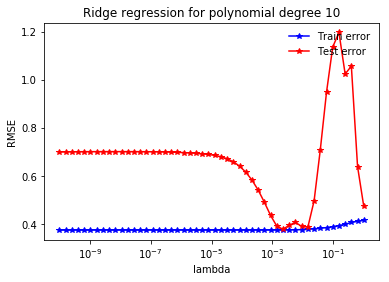

In [118]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-10, 0, 50)
    # split data
    x_tr, x_te, y_tr, y_te = split_data(x, y, ratio, seed)
    # form tx
    tx_tr = build_poly(x_tr, degree)
    tx_te = build_poly(x_te, degree)

    # ridge regression with different lambda
    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ridge regression
        weight, loss = ridge_regression(y_tr, tx_tr, lambda_)
        rmse_tr.append(np.sqrt(2 * compute_loss(y_tr, tx_tr, weight)))
        rmse_te.append(np.sqrt(2 * compute_loss(y_te, tx_te, weight)))

        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)
    
seed = 1
degree = 10
split_ratio = 0.9
ridge_regression_demo(x, y, degree, split_ratio, seed)

### Logistic Regression

In [103]:
x.shape, y.shape

((250000, 23), (250000,))

In [20]:
def logistic_regression_gradient_descent_demo(y, tx):
    y = np.expand_dims(y, axis=1)
    # init parameters
    max_iter = 3000
    threshold = 1e-8
    gamma = 0.1
    losses = []

    # build tx
    # tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))
    t = tx.dot(w);

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        
        # log info
        #if iter % 100 == 0:
            #print("Current iteration={i}, loss={l}".format(i=iter, l=loss))       
                
        # converge criterion
        # losses.append(loss)
        # if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            # break
    # visualization
    #visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent")
    print("loss={l}".format(l=compute_log_loss(y, tx, w)))
    return w

w = logistic_regression_gradient_descent_demo(y, tx)

loss=184884.08231760474


### Cross Validation

Progress: 60 / 60
Progress: 59 / 60
Progress: 58 / 60
Progress: 57 / 60
Progress: 56 / 60
Progress: 55 / 60
Progress: 54 / 60
Progress: 53 / 60
Progress: 52 / 60
Progress: 51 / 60
Progress: 50 / 60
Progress: 49 / 60
Progress: 48 / 60
Progress: 47 / 60
Progress: 46 / 60
Progress: 45 / 60
Progress: 44 / 60
Progress: 43 / 60
Progress: 42 / 60
Progress: 41 / 60
Progress: 40 / 60
Progress: 39 / 60
Progress: 38 / 60
Progress: 37 / 60
Progress: 36 / 60
Progress: 35 / 60
Progress: 34 / 60
Progress: 33 / 60
Progress: 32 / 60
Progress: 31 / 60
Progress: 30 / 60
Progress: 29 / 60
Progress: 28 / 60
Progress: 27 / 60
Progress: 26 / 60
Progress: 25 / 60
Progress: 24 / 60
Progress: 23 / 60
Progress: 22 / 60
Progress: 21 / 60
Progress: 20 / 60
Progress: 19 / 60
Progress: 18 / 60
Progress: 17 / 60
Progress: 16 / 60
Progress: 15 / 60
Progress: 14 / 60
Progress: 13 / 60
Progress: 12 / 60
Progress: 11 / 60
Progress: 10 / 60
Progress: 9 / 60
Progress: 8 / 60
Progress: 7 / 60
Progress: 6 / 60
Progress: 5 / 

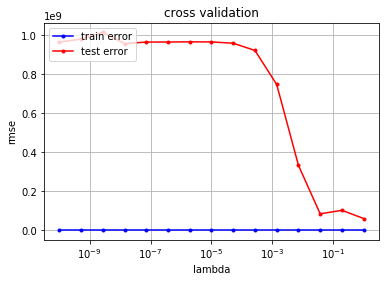

In [47]:
def cross_validation_demo(y,x):
    seed = 32
    degree = 10
    k_fold = 4
    step = 15
    lambdas = np.logspace(-10, 0, step)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    rmse_tr = []
    rmse_te = []
    progress = step * k_fold
    for ind, lambda_ in enumerate(lambdas):
        # ridge regression
        for k in range(4):
            print("Progress: " + str(progress) + " / " + str(step * k_fold))
            progress = progress - 1
            [a,b] = cross_validation(y,x,k_indices,k,lambda_,degree)
            rmse_tr.append(a)
            rmse_te.append(b)
    rmse_tr = np.asarray(rmse_tr).reshape(-1,4)
    rmse_te = np.asarray(rmse_te).reshape(-1,4)
    rmse_tr = np.mean(rmse_tr,axis=1)
    rmse_te = np.mean(rmse_te,axis=1)
    # cross validation: TODO
    # ***************************************************   
    cross_validation_visualization(lambdas,rmse_tr,rmse_te)
cross_validation_demo(y,tx)

In [10]:
print(rmse_te)

NameError: name 'rmse_te' is not defined

### TEST

In [7]:
test_label,test_data,test_id_ = load_csv_data("test.csv", sub_sample=False)

In [17]:
test_data = clean_data(test_data)

In [8]:
x_test,mean_test,std_x_test = standardize(test_data)
y_test,tx_test = build_model_data(test_label,x_test)
tx_test_poly = build_poly(tx_test, degree = 10)

In [11]:
#weight = logistic_regression_gradient_descent_demo(y,tx)
weights = logistic_regression_gradient_descent_demo(y, tx)

/Users/erdembocugoz/Desktop/Machine Learning/MLProject1/implementations.py:130: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-t))


loss=184883.9378858205


In [12]:
y_pred = predict_labels(weights,tx_test)

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

In [13]:
create_csv_submission(test_id_,y_pred,"logisticReg_submission.csv")